In [2]:
import pandas as pd

In [3]:
# 1) https://thecleverprogrammer.com/2023/10/18/arima-and-sarima-for-time-series-forecasting/
# this link is different 

# 2) https://www.youtube.com/watch?v=W-YCKMNTcqE
# EDA time series..

# https://www.youtube.com/watch?v=Lgy3ANiVJos&list=PLqYFiz7NM_SMC4ZgXplbreXlRY4Jf4zBP&index=3
# https://www.youtube.com/watch?v=NzSyQcJ9NeE

In [4]:
df=pd.read_csv

In [5]:
df.head(9)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0


In [6]:
df.columns=['Month','Sales']
df.head(5)

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [8]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [9]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [10]:
df.drop(106,axis=0,inplace=True)

In [11]:
df.drop(105,axis=0,inplace=True)

In [12]:
df.shape

(105, 2)

In [13]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [14]:
df['Month'] = pd.to_datetime(df['Month'])

In [15]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [16]:
df.head()
#index should be time related.

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [17]:
df.set_index('Month',inplace=True)

In [18]:
df.describe

<bound method NDFrame.describe of              Sales
Month             
1964-01-01  2815.0
1964-02-01  2672.0
1964-03-01  2755.0
1964-04-01  2721.0
1964-05-01  2946.0
...            ...
1972-05-01  4618.0
1972-06-01  5312.0
1972-07-01  4298.0
1972-08-01  1413.0
1972-09-01  5877.0

[105 rows x 1 columns]>

<AxesSubplot:xlabel='Month'>

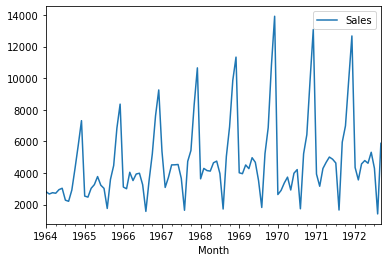

In [19]:
df.plot()

In [20]:
# will do some  test to check whether there is some stastistical pattern data present in data.
#augumentedDiKifuller test.

In [21]:
#!pip install statsmodels

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
## hypothesis testing 
## Ho(NULL) - data is not stat
## H1(alt.) - data is st.

In [24]:
adfuller(df['Sales'])

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [25]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF test statistics','P-value' ,'Lags used','number of obs used']
    for value,label in zip(result,labels):
        print('{} : {}' .format(label,value))
    if result[1]<=0.05:
        print('Strong evidence against null hypo, reject the null hypo & data is stationary')
    else:
        print('Weak evidence against null hypo, accept the null hypo & data is not stationary')

In [26]:
adfuller_test(df['Sales'])

ADF test statistics : -1.8335930563276297
P-value : 0.3639157716602417
Lags used : 11
number of obs used : 93
Weak evidence against null hypo, accept the null hypo & data is not stationary


In [27]:
## Must condition for time series..
## Data must be stationary
## if it is not then how to make the data stationary usinf deffernencing

In [28]:
df.head(3)

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0


In [29]:
df['Sales First diff'] = df['Sales'] - df['Sales'].shift(1)

In [30]:
df.head(3)

,Sales,Sales First diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0


In [31]:
df['Seasonal First diff'] = df['Sales'] - df['Sales'].shift(12)

In [32]:
df.head(2)

,Sales,Sales First diff,Seasonal First diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN


In [33]:
adfuller_test(df['Seasonal First diff'].dropna())

ADF test statistics : -7.626619157213163
P-value : 2.060579696813685e-11
Lags used : 0
number of obs used : 92
Strong evidence against null hypo, reject the null hypo & data is stationary


<AxesSubplot:xlabel='Month'>

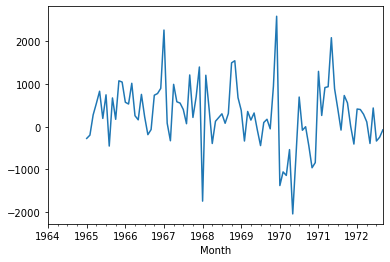

In [34]:
df['Seasonal First diff'].plot()

In [35]:
## ARIMA
## (p,d,q)
## p = pacf graph
## d = 1
## q = acf graph

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [37]:
import matplotlib.pyplot as plt

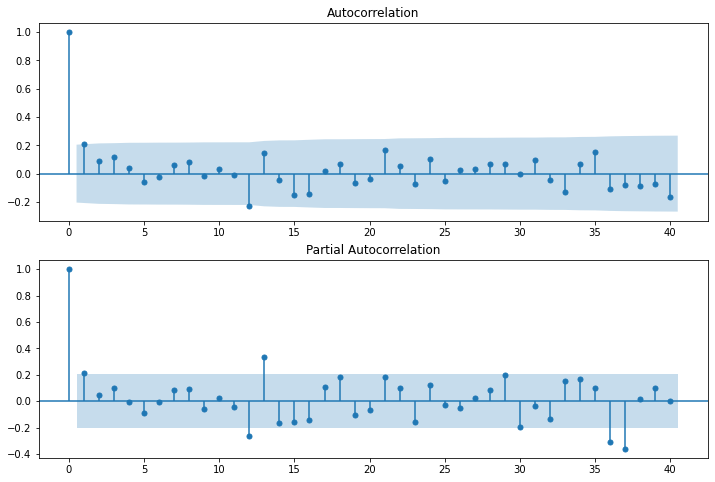

In [38]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First diff'].iloc[13:],lags=40,ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First diff'].iloc[13:],lags=40,ax=ax2)




In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
model=ARIMA(df['Sales'],order=(1,1,1))

C:\Users\Abhijeet\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Abhijeet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency

In [41]:
model=model.fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 28 Oct 2023   AIC                           1910.251
Time:                        16:23:19   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7853     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [43]:
df.shape

(105, 3)

In [44]:
df['forecast'] =model.predict(start=90,end=103,dynamic=True)

In [45]:
df.tail(20)

,Sales,Sales First diff,Seasonal First diff,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,473.093408
1971-08-01,1659.0,-2974.0,-79.0,218.374684
1971-09-01,5951.0,4292.0,730.0,107.738696
1971-10-01,6981.0,1030.0,557.0,59.684427


<AxesSubplot:xlabel='Month'>

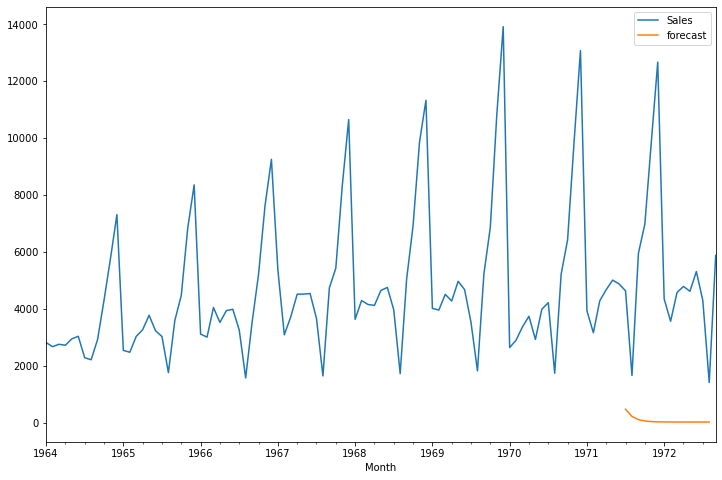

In [47]:
df[['Sales','forecast']].plot(figsize=(12,8))

In [48]:
# Seasonal data   -- ARIMA is NOT
# SARIMAX

In [49]:
import statsmodels.api as sm

In [ ]:
# (p,d,q,shift_value)

In [50]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

C:\Users\Abhijeet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Abhijeet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [51]:
results = model.fit()

In [52]:
df['forecast_SARIMAX'] = results.predict(start=90,end=103,dynamic=True)

<AxesSubplot:xlabel='Month'>

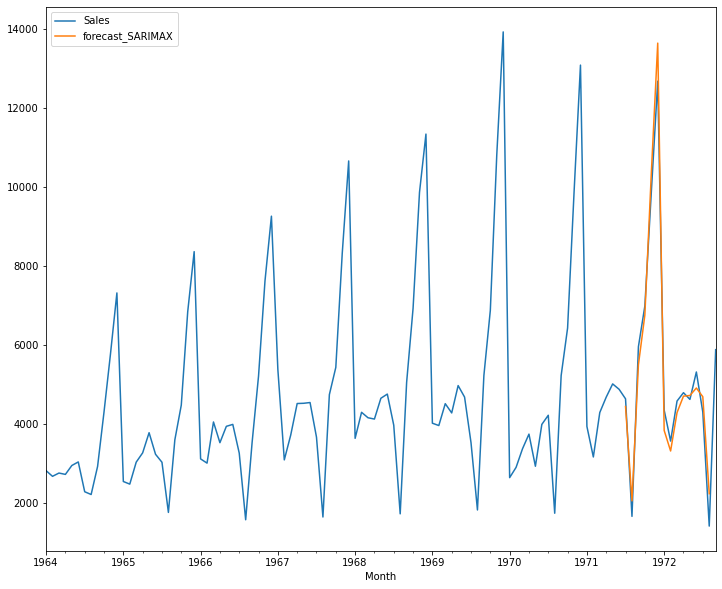

In [53]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,10))

In [75]:
# will create some new date to test our model

In [55]:
from pandas.tseries.offsets import DateOffset

In [57]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [60]:
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,24)]

In [63]:
future_dates[1:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [64]:
future_dateset = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [66]:
future_dateset.tail()

,Sales,Sales First diff,Seasonal First diff,forecast,forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [67]:
future_dateset.shape

(23, 5)

In [69]:
future_df=pd.concat([df,future_dateset])

In [70]:
future_df.shape

(128, 5)

In [71]:
future_df['forecast_SARIMAX2'] = results.predict(start=104,end=124,dynamic=True)

<AxesSubplot:>

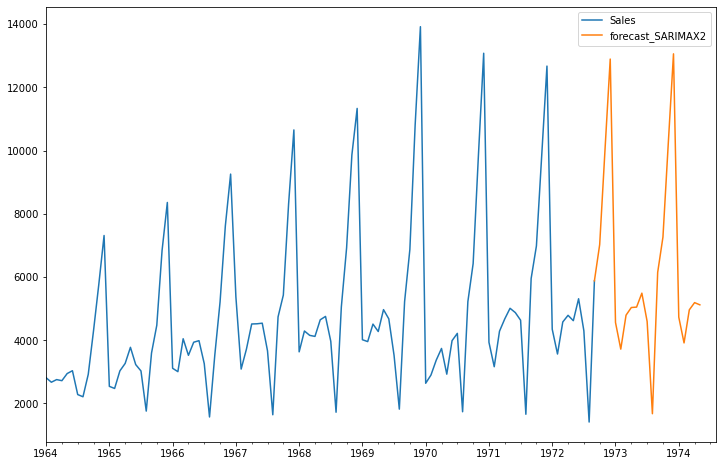

In [74]:
future_df[['Sales','forecast_SARIMAX2']].plot(figsize=(12,8))